# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load Data

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [11]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

# EDA

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce18785280>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce18785940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce18771ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce18790040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce187903a0>],
 'means': []}

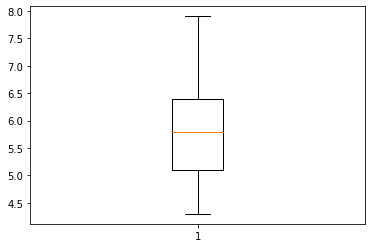

In [13]:
plt.boxplot(df['sepal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce1883af10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce1310ae20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce1883abb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce18847c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce18847fd0>],
 'means': []}

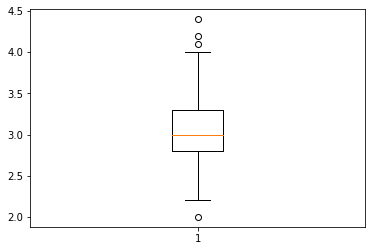

In [14]:
plt.boxplot(df['sepal_width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce188a2850>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce188a2f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce188a24f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce188af640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce188af9a0>],
 'means': []}

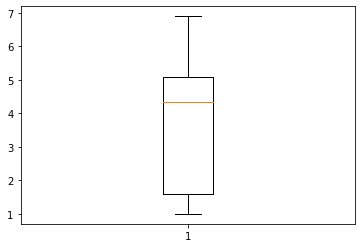

In [15]:
plt.boxplot(df['petal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce18904850>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce18904f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce189044f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce18912610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce18912970>],
 'means': []}

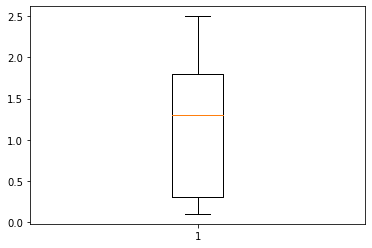

In [16]:
plt.boxplot(df['petal_width'])

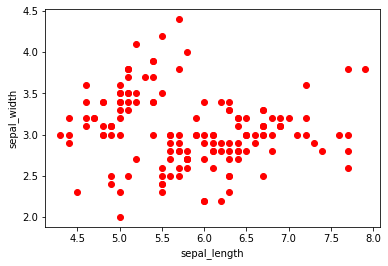

In [17]:
plt.scatter(df['sepal_length'] , df['sepal_width'] , color = 'red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

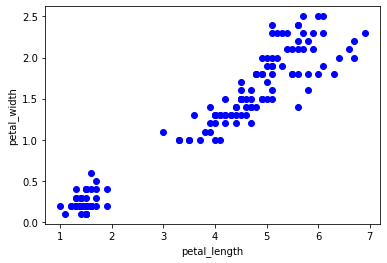

In [18]:
plt.scatter(df['petal_length'] , df['petal_width'] , color = 'blue')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

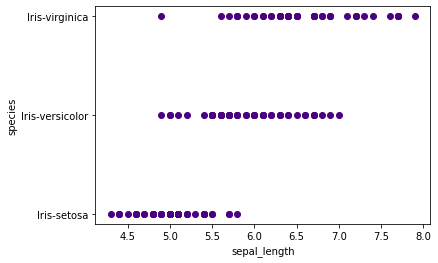

In [19]:
plt.scatter(df['sepal_length'] , df['species'] , color = 'indigo')
plt.xlabel('sepal_length')
plt.ylabel('species')
plt.show()

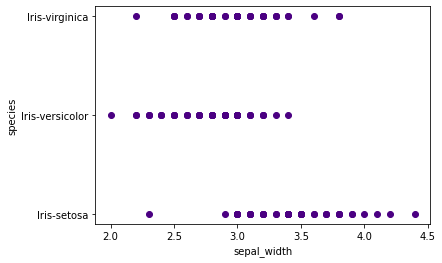

In [20]:
plt.scatter(df['sepal_width'], df['species']  , color = 'indigo')
plt.xlabel('sepal_width')
plt.ylabel('species')
plt.show()

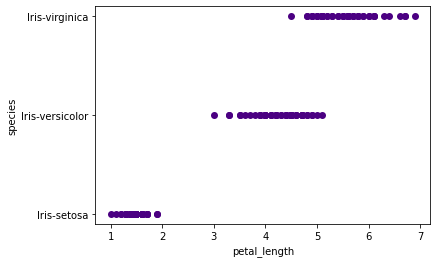

In [21]:
plt.scatter(df['petal_length'], df['species'] , 25 , color = 'indigo' , linewidths=2)
plt.xlabel('petal_length')
plt.ylabel('species')
plt.show()

# DATA PREPARATION

# model training

In [22]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.head(5)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
from sklearn.linear_model import LogisticRegression

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=90)
classifier = LogisticRegression()  
classifier.fit(x_train , y_train)  

C:\Users\manju\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# predictions

In [27]:
y_pred = classifier.predict(x_test)
y_pred = y_pred.reshape(len(y_pred),1)
print(y_pred)

[['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]


# model evaluation

In [28]:
print(classifier.predict([[5.2,3.5,1.5,0.2]]))

['Iris-setosa']


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test , y_pred)         #-->there are 
print(cm)

[[16  0  0]
 [ 0  8  1]
 [ 0  1 19]]


In [30]:
print(accuracy_score(y_test,y_pred)*100)

95.55555555555556
